## 준비과정

In [1]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,245 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 22.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
plt.rc('font', family='NanumBarunGothic') 
#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

##**시계열 군집 분석**

#데이터 불러오기

In [6]:
# 2019년 데이터 호출
df_2020 = pd.read_csv("/content/drive/MyDrive/딥러닝논문/데이터/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.csv",encoding="cp949")
df_2021 = pd.read_csv("/content/drive/MyDrive/딥러닝논문/데이터/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv",encoding="cp949")

In [10]:
# 2안 매출합을 다구하고 스케일링하기 위한 필요 데이터 호출
m20 = pd.DataFrame(df_2020[['기준_분기_코드','상권_코드','분기당_매출_금액']])
m21 = pd.DataFrame(df_2021[['기준_분기_코드','상권_코드','분기당_매출_금액']])

In [11]:

m20 = m20.groupby(['상권_코드','기준_분기_코드']).mean('분기당_매출_금액')
m21 = m21.groupby(['상권_코드','기준_분기_코드']).mean('분기당_매출_금액')

In [12]:
m20 = m20.unstack('기준_분기_코드')
m21 = m21.unstack('기준_분기_코드')

In [14]:
m2021 = pd.concat([m20,m21], axis=1)

In [16]:
m2021.isnull().sum()

           기준_분기_코드
분기당_매출_금액  1           1
           2           2
           3           1
           4           1
           1           1
           2           1
           3           1
           4           2
dtype: int64

In [17]:
m2021 = m2021.dropna(axis=0)

In [18]:
m2021.shape

(1647, 8)

In [19]:
m2021

분기당_매출_금액                                            \
기준_분기_코드             1             2             3             4   
상권_코드                                                              
1001491   2.033699e+09  1.614104e+09  1.601467e+09  1.728826e+09   
1001492   6.411864e+09  6.847662e+09  5.675041e+09  5.740557e+09   
1001493   4.818976e+09  5.361725e+09  4.512886e+09  4.992818e+09   
1001494   4.124364e+09  4.548066e+09  4.077427e+09  4.172719e+09   
1001495   3.138566e+09  3.595770e+09  3.806188e+09  3.841169e+09   
...                ...           ...           ...           ...   
2130322   1.627140e+08  1.856723e+08  1.726561e+08  1.580719e+08   
2130323   4.479931e+08  4.831856e+08  4.267587e+08  4.281971e+08   
2130324   1.913480e+08  2.677474e+08  2.198797e+08  1.872001e+08   
2130325   2.964188e+08  2.933115e+08  3.012346e+08  3.091291e+08   
2130326   3.119096e+08  4.463894e+08  4.321636e+08  4.793034e+08   

                                                                  
기준_분기_코드             1             2             3             4  
상권_코드                                                             
1001491   1.463283e+09  2.194246e+09  1.858820e+09  2.102435e+09  
1001492   5.325124e+09  6.496167e+09  5.561561e+09  7.004850e+09  
1001493   3.958990e+09  5.362481e+09  4.671395e+09  4.939837e+09  
1001494   3.939466e+09  4.409322e+09  3.819766e+09  4.512869e+09  
1001495   3.390426e+09  4.296137e+09  3.865723e+09  2.432309e+09  
...                ...           ...           ...           ...  
2130322   1.571092e+08  1.865566e+08  1.998633e+08  1.640745e+08  
2130323   4.638729e+08  4.244267e+08  5.248491e+08  4.043702e+08  
2130324   1.760180e+08  1.674521e+08  1.835068e+08  2.009487e+08  
2130325   2.997261e+08  2.829956e+08  3.850071e+08  3.707838e+08  
2130326   5.306302e+08  5.643077e+08  5.807152e+08  5.646783e+08  

[1647 rows x 8 columns]

#데이터 스케일링 time  어쩌구 ~

In [20]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


In [21]:
t_m2021 = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(m2021).squeeze(axis = 2)

In [23]:
t_m2021.shape

(1647, 8)

In [25]:
#데이터의 형태
pd.DataFrame(t_m2021)

,0,1,2,3,4,5,6,7
0,0.842664,-0.848374,-0.899301,-0.386026,-1.456208,1.489693,0.137872,1.119679
1,0.469651,1.203216,-0.770622,-0.660341,-1.359627,0.611555,-0.961640,1.467807
2,-0.019497,1.238428,-0.728920,0.383415,-2.012684,1.240181,-0.361546,0.260623
3,-0.305523,1.394742,-0.493879,-0.111480,-1.047497,0.837976,-1.527839,1.253499
4,-0.767394,0.094193,0.490721,0.556640,-0.292772,1.414014,0.602912,-2.098315
...,...,...,...,...,...,...,...,...
1642,-0.723403,0.839604,-0.046542,-1.039436,-1.104979,0.899805,1.805728,-0.630776
1643,-0.067522,0.897015,-0.649501,-0.610078,0.367705,-0.713415,2.038907,-1.263112
1644,-0.265173,2.294539,0.690763,-0.404145,-0.778794,-1.065792,-0.527889,0.056491
1645,-0.583607,-0.670347,-0.449177,-0.228807,-0.491287,-0.958310,1.889284,1.492251


# 데이터 분석

In [26]:
from tslearn.clustering import TimeSeriesKMeans
modelT = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=100) 
modelT.fit_transform(t_m2021)

/usr/local/lib/python3.8/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1647 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([[2.19777118, 2.7340566 , 2.42693355, 2.74056024, 2.62800567,
        1.5720505 ],
       [1.31941465, 3.0610373 , 2.56393829, 2.42850987, 2.69311287,
        1.52565927],
       [2.13719226, 2.40355158, 2.90507476, 2.24492414, 2.09952056,
        2.28033065],
       ...,
       [2.37990184, 1.70661316, 3.13311042, 2.23564687, 2.33047254,
        1.78743789],
       [1.61150885, 3.20744468, 1.63131527, 4.46157998, 2.48663382,
        3.07051742],
       [2.63650136, 2.73927465, 1.65683399, 4.74816026, 1.99318566,
        3.77445286]])

In [28]:
modelT.cluster_centers_.shape

(6, 8, 1)

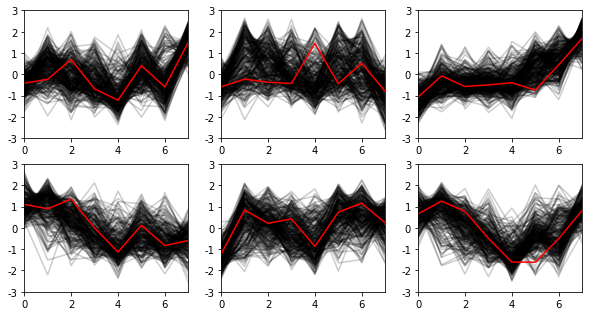

In [34]:
sz = t_m2021.shape[1]

plt.figure(figsize=(10,8))
for yi in range(6):
    plt.subplot(3,3, yi + 1)
    for xx in range(len(modelT.labels_)):
          if modelT.labels_[xx] == yi:
                plt.plot(t_m2021[xx], "k-", alpha=0.2)
                
    plt.xlim(0, sz-1)
    plt.ylim(-3, 3)
    plt.plot(modelT.cluster_centers_[yi].ravel(), "r-")


In [ ]:
modelT.cluster_centers_[0].ravel() # 중심점 위치들